In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv('heart.csv')
data['Cholesterol'] = data['Cholesterol'].replace(['0', 0], np.nan)
data.shape
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


## Some correlations

0.05875823535807307


<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

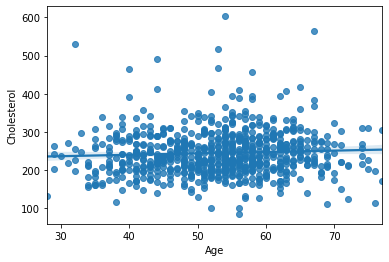

In [2]:
print(data['Age'].corr(data['Cholesterol']))
sns.regplot(x=data["Age"], y=data["Cholesterol"])

0.2543993561515447


<AxesSubplot:xlabel='Age', ylabel='RestingBP'>

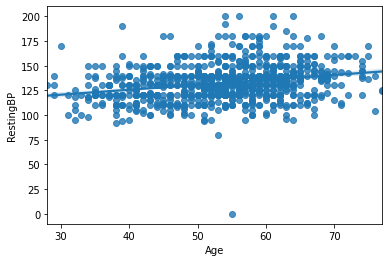

In [3]:
print(data['Age'].corr(data["RestingBP"]))
sns.regplot(x=data["Age"], y=data["RestingBP"])

-0.3820446750319705


<AxesSubplot:xlabel='Age', ylabel='MaxHR'>

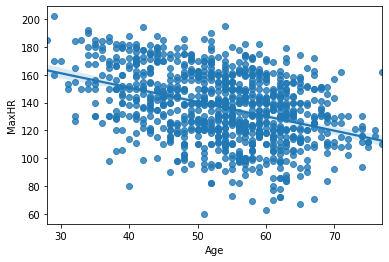

In [4]:
print(data['Age'].corr(data['MaxHR']))
sns.regplot(x=data['Age'], y=data['MaxHR'])

0.25861153601875625


<AxesSubplot:xlabel='Age', ylabel='Oldpeak'>

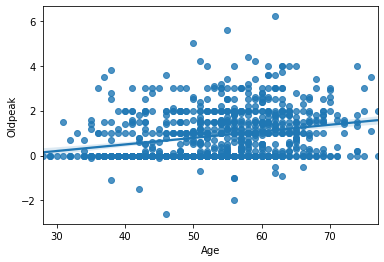

In [5]:
print(data['Age'].corr(data['Oldpeak']))
sns.regplot(x=data['Age'], y=data['Oldpeak'])

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

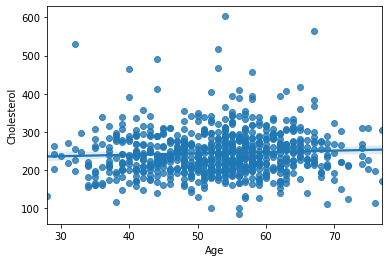

In [6]:
data['Age'].corr(data['Cholesterol'])
sns.regplot(x=data["Age"], y=data["Cholesterol"])

In [7]:
menSlopeFlat4758 = data[(data['ST_Slope'] == 'Flat') & (data['HeartDisease'] == 1) & (data['Age'] > 47) & (data['Age'] < 58) & (data['Sex'] == 'M')]
data[(data['HeartDisease'] == 1) & (data['Age'] > 67) & (data['Sex'] == 'M') & (data['Cholesterol'] > 150)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
447,77,M,ASY,124,171.0,0,ST,110,Y,2.0,Up,1
490,72,M,NAP,120,214.0,0,Normal,102,Y,1.0,Flat,1
491,75,M,ASY,170,203.0,1,ST,108,N,0.0,Flat,1
502,69,M,ASY,140,208.0,0,ST,140,Y,2.0,Flat,1
506,75,M,ASY,136,225.0,0,Normal,112,Y,3.0,Flat,1
516,68,M,NAP,150,195.0,1,Normal,132,N,0.0,Flat,1
529,72,M,ASY,143,211.0,0,Normal,109,Y,1.4,Flat,1
537,74,M,ASY,150,258.0,1,ST,130,Y,4.0,Down,1
543,70,M,ASY,170,192.0,0,ST,129,Y,3.0,Down,1
552,71,M,NAP,144,221.0,0,Normal,108,Y,1.8,Flat,1


## Chest pain type and heart disease

<AxesSubplot:xlabel='ChestPainType'>

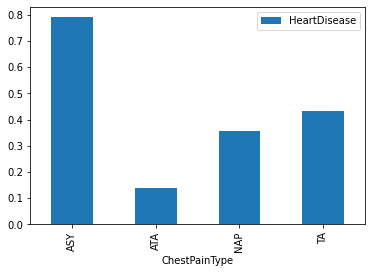

In [8]:
#people divided into four groups according to "ChestPainType"
chest_asy = data[data['ChestPainType'] == 'ASY']
chest_ata = data[data['ChestPainType'] == 'ATA']
chest_nap = data[data['ChestPainType'] == 'NAP']
chest_ta = data[data['ChestPainType'] == 'TA']

#proportion of people with heart disease in "ChestPainType" groups
asy_HD = chest_asy.HeartDisease.value_counts()[1]/chest_asy.Age.count()
ata_HD = chest_ata.HeartDisease.value_counts()[1]/chest_ata.Age.count()
nap_HD = chest_nap.HeartDisease.value_counts()[1]/chest_nap.Age.count()
ta_HD = chest_ta.HeartDisease.value_counts()[1]/chest_ta.Age.count()

#proportions into data frame
chest = pd.DataFrame({'ChestPainType': ["ASY", "ATA", "NAP", "TA"],
                   'HeartDisease': [asy_HD, ata_HD, nap_HD, ta_HD]})

chest.plot(x='ChestPainType', y=None, kind ='bar')



In [9]:
print(data.Oldpeak.max())
print(data.Oldpeak.min())

6.2
-2.6


# Goal 2. Finding features associations with heart disease using Aprior algorithm

## Changing data from numeric to categoric

In [10]:
#copy of data ro be maiputated
data_2 = data.copy(deep=True)

# "Cholesterol" change to groups: Chol_Good < 200; Chol_Borderline 200 <= and >= 239; Chol_High > 239 
for i in range(len(data_2)):
    if data_2.loc[i, "Cholesterol"] < 200:
        data_2.loc[i, "Cholesterol"] = 'Chol_Good'
    elif data_2.loc[i, "Cholesterol"] >= 200 and data_2.loc[i, "Cholesterol"] < 240:
        data_2.loc[i, "Cholesterol"] = 'Chol_Borderline'
    else:
        data_2.loc[i, "Cholesterol"] = 'Chol_High'

# "RestingBP" to groups: R_BP_Normal < 120; R_BP_Elevated 120-129; R_BP_High1 130-139; High2 140-180; R_BP_Danger > 180 
    if data_2.loc[i, "RestingBP"] < 120:
        data_2.loc[i, "RestingBP"] = 'R_BP_Normal'
    elif data_2.loc[i, "RestingBP"] >= 120 and data_2.loc[i, "RestingBP"] < 130:
        data_2.loc[i, "RestingBP"] = 'R_BP_Elevated'
    elif data_2.loc[i, "RestingBP"] >= 130 and data_2.loc[i, "RestingBP"] < 140:
        data_2.loc[i, "RestingBP"] = 'R_BP_High1'
    elif data_2.loc[i, "RestingBP"] >= 140 and data_2.loc[i, "RestingBP"] <= 180:
        data_2.loc[i, "RestingBP"] = 'R_BP_High2' 
    else:
        data_2.loc[i, "RestingBP"] = 'R_BP_Danger'
        
# "FastingBS 0 - Normal, 1 - High 
    if data_2.loc[i, "FastingBS"] == 0:
        data_2.loc[i, "FastingBS"] = 'F_BS_Normal'
    else:
        data_2.loc[i, "FastingBS"] = 'F_BS_High'

# "Oldpeak 0 - OP_Normal; < 0 - OP_Under; > 0; OP_Over 
    if data_2.loc[i, "Oldpeak"] == 0:
        data_2.loc[i, "Oldpeak"] = 'OP_Normal'
    elif data_2.loc[i, "Oldpeak"] < 0:
        data_2.loc[i, "Oldpeak"] = 'OP_Under'
    else:
        data_2.loc[i, "Oldpeak"] = 'OP_Over'      

# "HeartDisease 0 - HD_No, 1 - HD_Yes
    if data_2.loc[i, "HeartDisease"] == 0:
        data_2.loc[i, "HeartDisease"] = 'HD_No'
    else:
        data_2.loc[i, "HeartDisease"] = 'HD_Yes'

# "adds info in front of feature values to understand it better later        
    data_2.loc[i, 'RestingECG'] = 'ECG_'+ data_2.loc[i, 'RestingECG']
    data_2.loc[i, 'ExerciseAngina'] = 'EXA_'+ data_2.loc[i, 'ExerciseAngina'] 
    
  
        
# data_3 is without age and MaxHR. 
data_3 = data_2.drop(['Age','MaxHR'], 1) 

## Creating transactions lists

In [11]:
# data_3 data frame converted to two (two dimensianal) transaction arrays that can be used for encoding 
# it with Apriori algorithm later 

# DATA SETS: PEOPLE WITH HEART DISEASE
# All patients with heart disease
transactionsYes = data_3[data_3['HeartDisease'] == 'HD_Yes'].drop(['Sex'], 1).values
# Men with heart disease
transactionsYesMen = data_3[(data_3['HeartDisease'] == 'HD_Yes') & (data_3['Sex'] == 'M')].drop(['Sex'], 1).values 
# Women with heart disease
transactionsYesWomen = data_3[(data_3['HeartDisease'] == 'HD_Yes') & (data_3['Sex'] == 'F')].drop(['Sex'], 1).values

# DATA SETS: PEOPLE WITH NO HEART DISEASE
# All patients without heart disease
transactionsNo = data_3[data_3['HeartDisease'] == 'HD_No'].drop(['Sex'], 1).values
# Men with no heart disease
transactionsNoMen = data_3[(data_3['HeartDisease'] == 'HD_No') & (data_3['Sex'] == 'M')].drop(['Sex'], 1).values
# Women with no heart disease
transactionsNoWomen = data_3[(data_3['HeartDisease'] == 'HD_No') & (data_3['Sex'] == 'F')].drop(['Sex'], 1).values


#AGE GROUPS WITH HEART DISEASE
#28-37; 28_37Men; 28_37Women
transactionsYes28_37 = data_2[(data_2['Age'] < 38) & (data_2['HeartDisease'] == 'HD_Yes')].drop(['Age','MaxHR'], 1) 
transactionsYes28_37Men = transactionsYes28_37[(transactionsYes28_37['Sex'] == 'M')].drop(['Sex'], 1).values
transactionsYes28_37Women = transactionsYes28_37[(transactionsYes28_37['Sex'] == 'F')].drop(['Sex'], 1).values
transactionsYes28_37 = transactionsYes28_37.drop(['Sex'], 1).values

#38-47; 38-47Men; 38-47Women
transactionsYes38_47 = data_2[(data_2['Age'] > 37) & (data_2['Age'] < 48) & (data_2['HeartDisease'] == 'HD_Yes')].drop(['Age','MaxHR'], 1)
transactionsYes38_47Men = transactionsYes38_47[(transactionsYes38_47['Sex'] == 'M')].drop(['Sex'], 1).values
transactionsYes38_47Women = transactionsYes38_47[(transactionsYes38_47['Sex'] == 'F')].drop(['Sex'], 1).values
transactionsYes38_47 = transactionsYes38_47.drop(['Sex'], 1).values

#48-57; 48-57Men; 48-57Women
transactionsYes48_57 = data_2[(data_2['Age'] > 47) & (data_2['Age'] < 58) & (data_2['HeartDisease'] == 'HD_Yes')].drop(['Age','MaxHR'], 1)
transactionsYes48_57Men = transactionsYes48_57[(transactionsYes48_57['Sex'] == 'M')].drop(['Sex'], 1).values
transactionsYes48_57Women = transactionsYes48_57[(transactionsYes48_57['Sex'] == 'F')].drop(['Sex'], 1).values
transactionsYes48_57 = transactionsYes48_57.drop(['Sex'], 1).values

#58-67; 58-67Men; 58-67Women
transactionsYes58_67 = data_2[(data_2['Age'] > 57) & (data_2['Age'] < 68) & (data_2['HeartDisease'] == 'HD_Yes')].drop(['Age','MaxHR'], 1)
transactionsYes58_67Men = transactionsYes58_67[(transactionsYes58_67['Sex'] == 'M')].drop(['Sex'], 1).values
transactionsYes58_67Women = transactionsYes58_67[(transactionsYes58_67['Sex'] == 'F')].drop(['Sex'], 1).values
transactionsYes58_67 = transactionsYes58_67.drop(['Sex'], 1).values

#68-77; 68-77Men; 68-77Women
transactionsYes68_77 = data_2[(data_2['Age'] > 67) & (data_2['HeartDisease'] == 'HD_Yes')].drop(['Age','MaxHR'], 1)
transactionsYes68_77Men = transactionsYes68_77[(transactionsYes68_77['Sex'] == 'M')].drop(['Sex'], 1).values
transactionsYes68_77Women = transactionsYes68_77[(transactionsYes68_77['Sex'] == 'F')].drop(['Sex'], 1).values
transactionsYes68_77 = transactionsYes68_77.drop(['Sex'], 1).values

transactionsYes28_37Women

array([['ASY', 'R_BP_Normal', 'Chol_High', 'F_BS_Normal', 'ECG_Normal',
        'EXA_Y', 'OP_Over', 'Flat', 'HD_Yes']], dtype=object)

## One-hot encoding. Preparing data for apriori algorithm.

In [12]:
from mlxtend.preprocessing import TransactionEncoder

#one hot encoding data as true or false so Apriori algorithm can use it
te = TransactionEncoder()

#ENCODED DATA SETS (TRUE, FALSE): PEOPLE WITH HEART DISEASE 
#encoding data frame of people with heart disease
te_ary_Yes = te.fit(transactionsYes).transform(transactionsYes)
df_Yes = pd.DataFrame(te_ary_Yes, columns=te.columns_)

#encoding data frame of men with heart disease
te_ary_YesMen = te.fit(transactionsYesMen).transform(transactionsYesMen)
df_YesMen = pd.DataFrame(te_ary_YesMen, columns=te.columns_)

#encoding data frame of women with heart disease
te_ary_YesWomen = te.fit(transactionsYesWomen).transform(transactionsYesWomen)
df_YesWomen = pd.DataFrame(te_ary_YesWomen, columns=te.columns_)


#ENCODED DATA SETS (TRUE, FALSE): PEOPLE WITH NO HEART DISEASE 
#encoding data frame of people with no heart disease
te_ary_No = te.fit(transactionsNo).transform(transactionsNo)
df_No = pd.DataFrame(te_ary_No, columns=te.columns_)

#encoding data frame of men with no heart disease
te_ary_NoMen = te.fit(transactionsNoMen).transform(transactionsNoMen)
df_NoMen = pd.DataFrame(te_ary_NoMen, columns=te.columns_)

#encoding data frame of women with no heart disease
te_ary_NoWomen = te.fit(transactionsNoWomen).transform(transactionsNoWomen)
df_NoWomen = pd.DataFrame(te_ary_NoWomen, columns=te.columns_)

#ENCODED DATA SETS (TRUE, FALSE): AGE GROUPS
#28-37
te_ary_Yes28_37 = te.fit(transactionsYes28_37).transform(transactionsYes28_37)
df_Yes28_37 = pd.DataFrame(te_ary_Yes28_37, columns=te.columns_)

te_ary_Yes28_37Men = te.fit(transactionsYes28_37Men).transform(transactionsYes28_37Men)
df_Yes28_37Men = pd.DataFrame(te_ary_Yes28_37Men, columns=te.columns_)

te_ary_Yes28_37Women = te.fit(transactionsYes28_37Women).transform(transactionsYes28_37Women)
df_Yes28_37Women = pd.DataFrame(te_ary_Yes28_37Women, columns=te.columns_)

#38-47
te_ary_Yes38_47 = te.fit(transactionsYes38_47).transform(transactionsYes38_47)
df_Yes38_47 = pd.DataFrame(te_ary_Yes38_47, columns=te.columns_)

te_ary_Yes38_47Men = te.fit(transactionsYes38_47Men).transform(transactionsYes38_47Men)
df_Yes38_47Men = pd.DataFrame(te_ary_Yes38_47Men, columns=te.columns_)

te_ary_Yes38_47Women = te.fit(transactionsYes38_47Women).transform(transactionsYes38_47Women)
df_Yes38_47Women = pd.DataFrame(te_ary_Yes38_47Women, columns=te.columns_)

#48-57
te_ary_Yes48_57 = te.fit(transactionsYes48_57).transform(transactionsYes48_57)
df_Yes48_57 = pd.DataFrame(te_ary_Yes48_57, columns=te.columns_)

te_ary_Yes48_57Men = te.fit(transactionsYes48_57Men).transform(transactionsYes48_57Men)
df_Yes48_57Men = pd.DataFrame(te_ary_Yes48_57Men, columns=te.columns_)

te_ary_Yes48_57Women = te.fit(transactionsYes48_57Women).transform(transactionsYes48_57Women)
df_Yes48_57Women = pd.DataFrame(te_ary_Yes48_57Women, columns=te.columns_)

#58-67
te_ary_Yes58_67 = te.fit(transactionsYes58_67).transform(transactionsYes58_67)
df_Yes58_67 = pd.DataFrame(te_ary_Yes58_67, columns=te.columns_)

te_ary_Yes58_67Men = te.fit(transactionsYes58_67Men).transform(transactionsYes58_67Men)
df_Yes58_67Men = pd.DataFrame(te_ary_Yes58_67Men, columns=te.columns_)

te_ary_Yes58_67Women = te.fit(transactionsYes58_67Women).transform(transactionsYes58_67Women)
df_Yes58_67Women = pd.DataFrame(te_ary_Yes58_67Women, columns=te.columns_)

#68-77
te_ary_Yes68_77 = te.fit(transactionsYes68_77).transform(transactionsYes68_77)
df_Yes68_77 = pd.DataFrame(te_ary_Yes68_77, columns=te.columns_)

te_ary_Yes68_77Men = te.fit(transactionsYes68_77Men).transform(transactionsYes68_77Men)
df_Yes68_77Men = pd.DataFrame(te_ary_Yes68_77Men, columns=te.columns_)

te_ary_Yes68_77Women = te.fit(transactionsYes68_77Women).transform(transactionsYes68_77Women)
df_Yes68_77Women = pd.DataFrame(te_ary_Yes68_77Women, columns=te.columns_)


## Using apriori algorithm to find frequent item sets

In [13]:
from mlxtend.frequent_patterns import apriori

# FREQUENT ITEM SETS MADE FROM ENCODED DATA SETS
#with heart disease
freq_itemsetsYes = apriori(df_Yes, min_support=5/len(df_Yes), use_colnames=True)  #use_colnames shows the names of items
freq_itemsetsYesMen = apriori(df_YesMen, min_support=5/len(df_YesMen), use_colnames=True)
freq_itemsetsYesWomen = apriori(df_YesWomen, min_support=5/len(df_YesWomen), use_colnames=True)

#with heart disease age groups
freq_itemsetsYes28_37 = apriori(df_Yes28_37, min_support=5/len(df_Yes28_37), use_colnames=True)
freq_itemsetsYes28_37Men = apriori(df_Yes28_37Men, min_support=5/len(df_Yes28_37Men), use_colnames=True)
freq_itemsetsYes28_37Women = apriori(df_Yes28_37Women, min_support=5/len(df_Yes28_37Women), use_colnames=True)

freq_itemsetsYes38_47 = apriori(df_Yes38_47, min_support=5/len(df_Yes38_47), use_colnames=True)
freq_itemsetsYes38_47Men = apriori(df_Yes38_47Men, min_support=5/len(df_Yes38_47Men), use_colnames=True)
freq_itemsetsYes38_47Women = apriori(df_Yes38_47Women, min_support=5/len(df_Yes38_47Women), use_colnames=True)

freq_itemsetsYes48_57 = apriori(df_Yes48_57, min_support=5/len(df_Yes48_57), use_colnames=True)
freq_itemsetsYes48_57Men = apriori(df_Yes48_57Men, min_support=5/len(df_Yes48_57Men), use_colnames=True)
freq_itemsetsYes48_57Women = apriori(df_Yes48_57Women, min_support=5/len(df_Yes48_57Women), use_colnames=True)

freq_itemsetsYes58_67 = apriori(df_Yes58_67, min_support=5/len(df_Yes58_67), use_colnames=True)
freq_itemsetsYes58_67Men = apriori(df_Yes58_67Men, min_support=5/len(df_Yes58_67Men), use_colnames=True)
freq_itemsetsYes58_67Women = apriori(df_Yes58_67Women, min_support=5/len(df_Yes58_67Women), use_colnames=True)

freq_itemsetsYes68_77 = apriori(df_Yes68_77, min_support=5/len(df_Yes68_77), use_colnames=True)
freq_itemsetsYes68_77Men = apriori(df_Yes68_77Men, min_support=5/len(df_Yes68_77Men), use_colnames=True)
freq_itemsetsYes68_77Women = apriori(df_Yes68_77Women, min_support=5/len(df_Yes68_77Women), use_colnames=True)

#without heart disease
freq_itemsetsNo = apriori(df_No, min_support=5/len(df_No), use_colnames=True)
freq_itemsetsNoMen = apriori(df_NoMen, min_support=5/len(df_NoMen), use_colnames=True)
freq_itemsetsNoWomen = apriori(df_NoWomen, min_support=5/len(df_NoWomen), use_colnames=True)



## Finding accociation rules from frequent item sets

In [14]:
from mlxtend.frequent_patterns import association_rules

#association rules results found, input: frequent data sets
#people with heart disease
resultYes = association_rules(freq_itemsetsYes,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)
resultYesMen = association_rules(freq_itemsetsYesMen,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)
resultYesWomen = association_rules(freq_itemsetsYesWomen,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)

#people with heart disease age groups

resultYes28_37 = association_rules(freq_itemsetsYes28_37,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)
resultYes28_37Men = association_rules(freq_itemsetsYes28_37Men,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)
#Only 1 woman in group "28_37Women" with heart disease
#resultYes28_37Women = association_rules(freq_itemsetsYes28_37Women,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)

resultYes38_47 = association_rules(freq_itemsetsYes38_47,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)
resultYes38_47Men = association_rules(freq_itemsetsYes38_47Men,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)
resultYes38_47Women = association_rules(freq_itemsetsYes38_47Women,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)

resultYes48_57 = association_rules(freq_itemsetsYes48_57,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)
resultYes48_57Men = association_rules(freq_itemsetsYes48_57Men,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)
resultYes48_57Women = association_rules(freq_itemsetsYes48_57Women,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)

resultYes58_67 = association_rules(freq_itemsetsYes58_67,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)
resultYes58_67Men = association_rules(freq_itemsetsYes58_67Men,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)
resultYes58_67Women = association_rules(freq_itemsetsYes58_67Women,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)

resultYes68_77 = association_rules(freq_itemsetsYes68_77,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)
resultYes68_77Men = association_rules(freq_itemsetsYes68_77Men,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)
# Only 1 woman in group "28_37Women" with heart disease
#resultYes68_77Women = association_rules(freq_itemsetsYes68_77Women,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)


#people with no heart disease
resultNo = association_rules(freq_itemsetsNo,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)
resultNoMen = association_rules(freq_itemsetsNoMen,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)
resultNoWomen = association_rules(freq_itemsetsNoWomen,metric='confidence',min_threshold=0.5).sort_values('support', ascending = False)




## Using results from created accociation rules and frequent item sets to create various bar charts

In [15]:
#goes through dataframe and changes item sets from frozen sets to more readable string

def changeFeatureValueNames(dataframe):
    dataframe.reset_index(inplace=True)
    for i in range(len(dataframe)):
        #if type(MenWomenYes.loc[i, "symptoms"]) == frozenset:
            #MenWomenYes.loc[i, "symptoms"] = ", ".join(MenWomenYes.loc[i, "symptoms"])
        if dataframe.loc[i, "symptoms"] == frozenset({'ASY'}):
            dataframe.loc[i, "symptoms"] = 'Chest Pain: ASY'
        elif dataframe.loc[i, "symptoms"] == frozenset({'Flat'}):
            dataframe.loc[i, "symptoms"] = 'ST_Slope: Flat'
        elif dataframe.loc[i, "symptoms"] == frozenset({'OP_Over'}):
            dataframe.loc[i, "symptoms"] = 'Oldpeak: Over'
        elif dataframe.loc[i, "symptoms"] == frozenset({'F_BS_Normal'}):
            dataframe.loc[i, "symptoms"] = 'Blood sugar: Normal'
        elif dataframe.loc[i, "symptoms"] == frozenset({'Chol_High'}):
            dataframe.loc[i, "symptoms"] = 'Cholesterol: High'   
        elif dataframe.loc[i, "symptoms"] == frozenset({'EXA_Y'}):
            dataframe.loc[i, "symptoms"] = 'Exercise Angina: Yes'
        elif dataframe.loc[i, "symptoms"] == frozenset({'OP_Over','ASY'}):
            dataframe.loc[i, "symptoms"] = '(Oldpeak: Over; Chest Pain: ASY)'
        elif dataframe.loc[i, "symptoms"] == frozenset({'ASY', 'Flat'}):
            dataframe.loc[i, "symptoms"] = '(Chest Pain: ASY; ST_Slope: Flat)'
        #elif dataframe.loc[i, "symptoms"] == frozenset({'Flat', 'ASY'}):
            #dataframe.loc[i, "symptoms"] = '(ST_Slope: Flat; Chest Pain: ASY)'
        elif dataframe.loc[i, "symptoms"] == frozenset({'ECG_Normal'}):
            dataframe.loc[i, "symptoms"] = 'ECG: Normal'    
        elif dataframe.loc[i, "symptoms"] == frozenset({'OP_Over', 'Flat'}):
            dataframe.loc[i, "symptoms"] = '(Oldpeak: Over; ST_Slope: Flat)'
        elif dataframe.loc[i, "symptoms"] == frozenset({'Chol_High', 'ASY'}):
            dataframe.loc[i, "symptoms"] = '(Cholesterol: High; Chest Pain: ASY)'
        elif dataframe.loc[i, "symptoms"] == frozenset({'Chol_High', 'Flat'}):
            dataframe.loc[i, "symptoms"] = '(Cholesterol: High; ST_Slope: Flat)'
        elif dataframe.loc[i, "symptoms"] == frozenset({'F_BS_Normal', 'Flat'}):
            dataframe.loc[i, "symptoms"] = '(Blood sugar: Normal; ST_Slope: Flat)'
        elif dataframe.loc[i, "symptoms"] == frozenset({'ASY', 'F_BS_Normal'}):
            dataframe.loc[i, "symptoms"] = '(Chest Pain: ASY; Blood sugar: Normal)' 
        elif dataframe.loc[i, "symptoms"] == frozenset({'ECG_Normal', 'Flat'}):
            dataframe.loc[i, "symptoms"] = '(ECG: Normal; ST_Slope: Flat)'
        elif dataframe.loc[i, "symptoms"] == frozenset({'OP_Over', 'Flat', 'F_BS_Normal'}):
            dataframe.loc[i, "symptoms"] = '(Blood sugar: Normal; ST_Slope: Flat; Oldpeak: Over)'
        elif dataframe.loc[i, "symptoms"] == frozenset({'EXA_Y', 'ASY'}):
            dataframe.loc[i, "symptoms"] = '(Exercise Angina: Yes; Chest Pain: ASY)' 
        elif dataframe.loc[i, "symptoms"] == frozenset({'EXA_Y', 'OP_Over'}):
            dataframe.loc[i, "symptoms"] = '(Exercise Angina: Yes; Oldpeak: Over)'  
        elif dataframe.loc[i, "symptoms"] == frozenset({'Chol_High', 'OP_Over'}):
            dataframe.loc[i, "symptoms"] = '(Cholesterol: High; Oldpeak: Over)'
        elif dataframe.loc[i, "symptoms"] == frozenset({'R_BP_High2'}):
            dataframe.loc[i, "symptoms"] = 'Blood pressure: High 2'    
        elif dataframe.loc[i, "symptoms"] == frozenset({'ECG_Normal', 'OP_Over'}):
            dataframe.loc[i, "symptoms"] = '(ECG: Normal, Oldpeak: Over)'  

        
    return dataframe

## Charts of all patients with heart disease

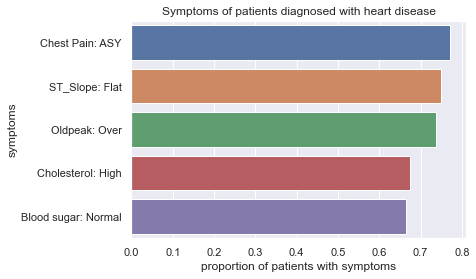

In [37]:
import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ALL PATIENTS WITH HEART DISEASE    
resultYes[(resultYes['consequents'] == frozenset({'HD_Yes'}))][0:20]
topTenYes = resultYes[(resultYes['consequents'] == frozenset({'HD_Yes'}))][0:5].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)

topTenYes.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)

topTenYes = changeFeatureValueNames(topTenYes)
topTenYes.rename(columns={'Proportion of symptoms': 'proportion of patients with symptoms'}, inplace=True)  

sbn.set()
fig, ax = plt.subplots(figsize=(6,4))

sbn.barplot(data=topTenYes, x='proportion of patients with symptoms', y='symptoms', ax=ax).set(title='Symptoms of patients diagnosed with heart disease')
#topTenYes.to_csv('TopTenHD_Yes_AllPatients', index=False)
plt.savefig('test', dpi=800, bbox_inches='tight')


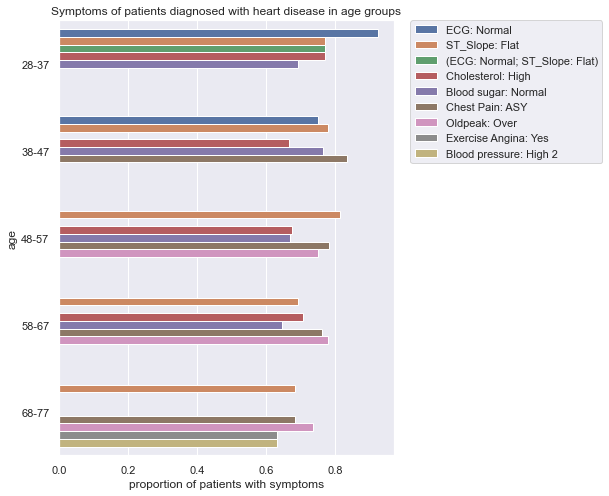

In [17]:
#5 most frequent feature values in each age group that patients have heart disease
resultYes28_37_top5 = resultYes28_37[resultYes28_37['consequents'] == frozenset({'HD_Yes'})][0:5].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
resultYes28_37_top5.rename(columns={'antecedents': 'symptoms', 'support': 'proportion of patients with symptoms'}, inplace=True)
resultYes28_37_top5 = changeFeatureValueNames(resultYes28_37_top5)
resultYes28_37_top5['age'] = '28-37'

resultYes38_47_top5 = resultYes38_47[resultYes38_47['consequents'] == frozenset({'HD_Yes'})][0:5].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
resultYes38_47_top5.rename(columns={'antecedents': 'symptoms', 'support': 'proportion of patients with symptoms'}, inplace=True)
resultYes38_47_top5 = changeFeatureValueNames(resultYes38_47_top5)
resultYes38_47_top5['age'] = '38-47'

resultYes48_57_top5 = resultYes48_57[resultYes48_57['consequents'] == frozenset({'HD_Yes'})][0:5].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
resultYes48_57_top5.rename(columns={'antecedents': 'symptoms', 'support': 'proportion of patients with symptoms'}, inplace=True)
resultYes48_57_top5 = changeFeatureValueNames(resultYes48_57_top5)
resultYes48_57_top5['age'] = '48-57'

resultYes58_67_top5 = resultYes58_67[resultYes58_67['consequents'] == frozenset({'HD_Yes'})][0:5].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
resultYes58_67_top5.rename(columns={'antecedents': 'symptoms', 'support': 'proportion of patients with symptoms'}, inplace=True)
resultYes58_67_top5 = changeFeatureValueNames(resultYes58_67_top5)
resultYes58_67_top5['age'] = '58-67'

resultYes68_77_top5 = resultYes68_77[resultYes68_77['consequents'] == frozenset({'HD_Yes'})][0:5].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
resultYes68_77_top5.rename(columns={'antecedents': 'symptoms', 'support': 'proportion of patients with symptoms'}, inplace=True)
resultYes68_77_top5 = changeFeatureValueNames(resultYes68_77_top5)
resultYes68_77_top5['age'] = '68-77'

resultAgeGroupsTop5 = pd.concat([resultYes28_37_top5, resultYes38_47_top5, resultYes48_57_top5, resultYes58_67_top5, resultYes68_77_top5])


sbn.set()
fig, ax = plt.subplots(figsize=(6,8))
sbn.barplot(data=resultAgeGroupsTop5, x='proportion of patients with symptoms', y='age', ax=ax, hue='symptoms').set(title='Symptoms of patients diagnosed with heart disease in age groups')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
resultAgeGroupsTop5
plt.savefig('agegroups', dpi=800, bbox_inches='tight')


## Charts of patients without heart disease

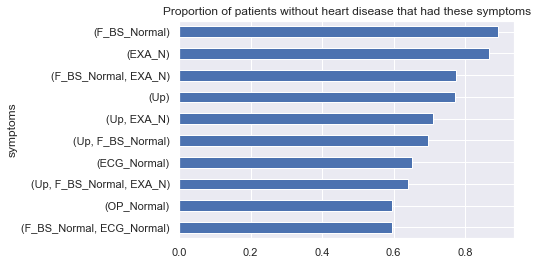

In [18]:
# ALL PATIENTS WITHOUT HEART DISEASE 
resultNo[(resultNo['consequents'] == frozenset({'HD_No'}))][0:20]
topTenNo = resultNo[(resultNo['consequents'] == frozenset({'HD_No'}))][0:10].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenNo.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
ax_all_Yes_HD = topTenNo.plot(kind = 'barh', x='symptoms', title='Proportion of patients without heart disease that had these symptoms', legend=False).invert_yaxis()
ax_all_Yes_HD


## Male patients with and without heart disease

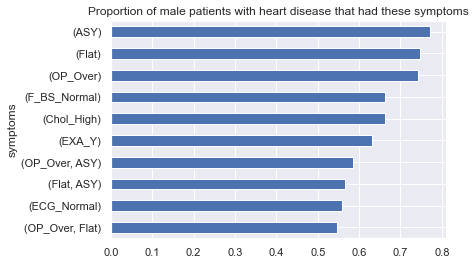

In [19]:
# ALL MEN WITH HEART DISEASE 
resultYesMen[(resultYesMen['consequents'] == frozenset({'HD_Yes'}))][0:20]
topTenYesMen = resultYesMen[(resultYesMen['consequents'] == frozenset({'HD_Yes'}))][0:10].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYesMen.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topFiveYesMen = resultYesMen[(resultYesMen['consequents'] == frozenset({'HD_Yes'}))][0:5].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topFiveYesMen.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)

topTenYesMen.plot(kind = 'barh', x='symptoms', title='Proportion of male patients with heart disease that had these symptoms', legend=False).invert_yaxis()


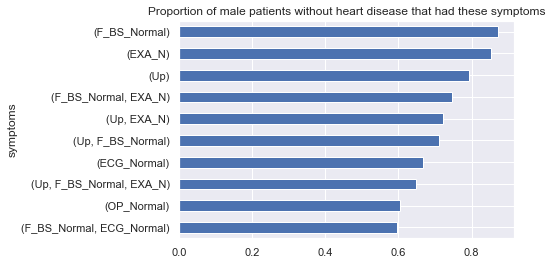

In [20]:
# ALL MEN WITHOUT HEART DISEASE
resultNoMen[(resultNoMen['consequents'] == frozenset({'HD_No'}))][0:20]
topTenNoMen = resultNoMen[(resultNoMen['consequents'] == frozenset({'HD_No'}))][0:10].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenNoMen.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenNoMen.plot(kind = 'barh', x='symptoms', title='Proportion of male patients without heart disease that had these symptoms', legend=False).invert_yaxis()


## Female patients with and without heart disease

,symptoms,consequents,Proportion of symptoms
43,(Chol_High),(HD_Yes),0.80
112,(Flat),(HD_Yes),0.78
17,(ASY),(HD_Yes),0.78
123,(OP_Over),(HD_Yes),0.70
103,(F_BS_Normal),(HD_Yes),0.68


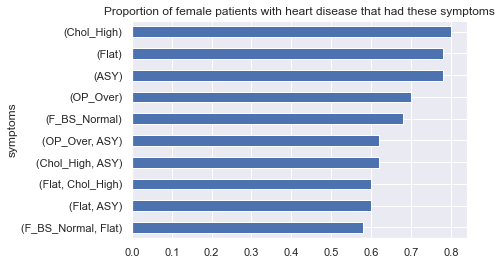

In [21]:
# ALL WOMEN WITH HEART DISEASE 
resultYesWomen[(resultYesWomen['consequents'] == frozenset({'HD_Yes'}))][0:20]
#Top10
topTenYesWomen = resultYesWomen[(resultYesWomen['consequents'] == frozenset({'HD_Yes'}))][0:10].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYesWomen.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
#Top5
topFiveYesWomen = resultYesWomen[(resultYesWomen['consequents'] == frozenset({'HD_Yes'}))][0:5].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topFiveYesWomen.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenYesWomen.plot(kind = 'barh', x='symptoms', title='Proportion of female patients with heart disease that had these symptoms', legend=False).invert_yaxis()
topFiveYesWomen

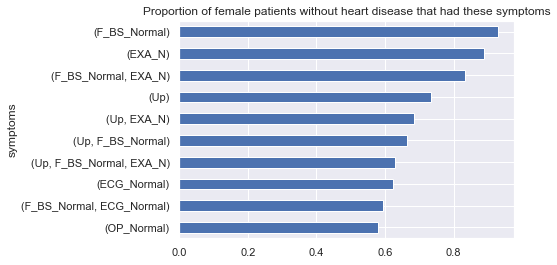

In [22]:
# ALL WOMEN WITHOUT HEART DISEASE 
resultNoWomen[(resultNoWomen['consequents'] == frozenset({'HD_No'}))][0:20]
topTenNoWomen = resultNoWomen[(resultNoWomen['consequents'] == frozenset({'HD_No'}))][0:10].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenNoWomen.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenNoWomen.plot(kind = 'barh', x='symptoms', title='Proportion of female patients without heart disease that had these symptoms', legend=False).invert_yaxis()


## Different age groups with heart disease

,symptoms,consequents,Proportion of symptoms,Sex
43,(Chol_High),(HD_Yes),0.80,F
112,(Flat),(HD_Yes),0.78,F
17,(ASY),(HD_Yes),0.78,F
123,(OP_Over),(HD_Yes),0.70,F
103,(F_BS_Normal),(HD_Yes),0.68,F


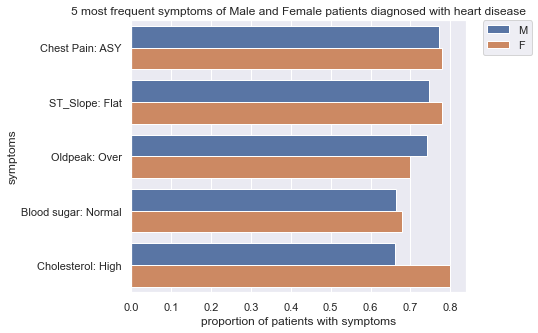

In [23]:
import seaborn as sbn

topTenYesMen['Sex'] = 'M'
topTenYesWomen['Sex'] = 'F'

MenWomenYes = pd.concat([topTenYesMen, topTenYesWomen]).sort_values(['symptoms', 'Proportion of symptoms'])
MenWomenYes = changeFeatureValueNames(MenWomenYes)      
MenWomenYes.rename(columns={'Proportion of symptoms': 'proportion of patients with symptoms'}, inplace=True)


topFiveYesMen['Sex'] = 'M'
topFiveYesWomen['Sex'] = 'F'

MenWomenYesTop5 = pd.concat([topFiveYesMen, topFiveYesWomen]).sort_values(['symptoms', 'Proportion of symptoms'])
MenWomenYesTop5 = changeFeatureValueNames(MenWomenYesTop5)
MenWomenYesTop5.rename(columns={'Proportion of symptoms': 'proportion of patients with symptoms'}, inplace=True)
    
sbn.set()
fig, ax = plt.subplots(figsize=(6,5))
#sbn.barplot(data=MenWomenYes, x='proportion of patients with symptoms', y='symptoms', ax=ax, hue='Sex', hue_order=['M','F']).set(title='Symptoms of Male and Female patients diagnosed with heart disease')
sbn.barplot(data=MenWomenYesTop5, x='proportion of patients with symptoms', y='symptoms', ax=ax, hue='Sex', hue_order=['M','F']).set(title='5 most frequent symptoms of Male and Female patients diagnosed with heart disease')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig('top5mf.pdf',  bbox_inches='tight')
#sbn.barplot(data=MenWomenYes, x='proportion of patients with symptoms', y='symptoms', hue='Sex', hue_order=['M','F'], orient = 'h').set(title='Symptoms of patients diagnosed with heart disease')
topFiveYesMen
topFiveYesWomen


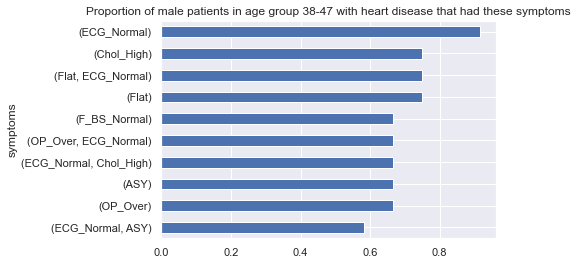

In [24]:
#MEN 28-37 WITH HEART DISEASE
resultYes28_37Men[(resultYes28_37Men['consequents'] == frozenset({'HD_Yes'}))][0:20]
topTenYes28_37Men = resultYes28_37Men[(resultYes28_37Men['consequents'] == frozenset({'HD_Yes'}))][0:10].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes28_37Men.rename(columns={'antecedents': 'symptoms', 'support': 'proportion of patients with symptoms'}, inplace=True)
topTenYes28_37Men.plot(kind = 'barh', x='symptoms', title='Proportion of male patients in age group 38-47 with heart disease that had these symptoms', legend=False).invert_yaxis()


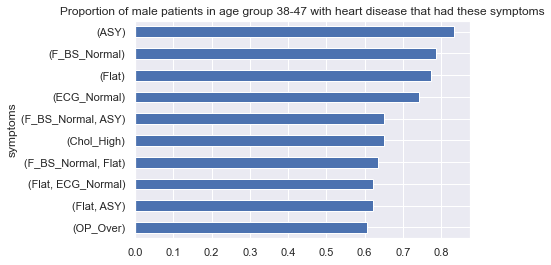

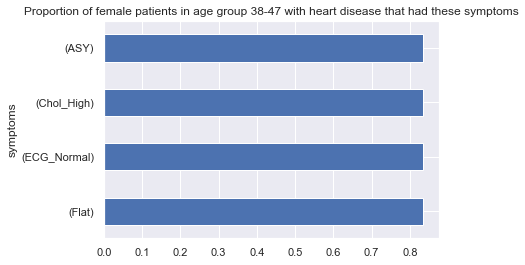

In [25]:
#MEN AND WOMEN 38-47 WITH HEART DISEASE
resultYes38_47Men[(resultYes38_47Men['consequents'] == frozenset({'HD_Yes'}))][0:20]
topTenYes38_47Men = resultYes38_47Men[(resultYes38_47Men['consequents'] == frozenset({'HD_Yes'}))][0:10].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes38_47Men.rename(columns={'antecedents': 'symptoms', 'support': 'proportion of patients with symptoms'}, inplace=True)
topTenYes38_47Men.plot(kind = 'barh', x='symptoms', title='Proportion of male patients in age group 38-47 with heart disease that had these symptoms', legend=False).invert_yaxis()

resultYes38_47Women[(resultYes38_47Women['consequents'] == frozenset({'HD_Yes'}))][0:20]
topTenYes38_47Women = resultYes38_47Women[(resultYes38_47Women['consequents'] == frozenset({'HD_Yes'}))][0:10].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes38_47Women.rename(columns={'antecedents': 'symptoms', 'support': 'proportion of patients with symptoms'}, inplace=True)
topTenYes38_47Women.plot(kind = 'barh', x='symptoms', title='Proportion of female patients in age group 38-47 with heart disease that had these symptoms', legend=False).invert_yaxis()


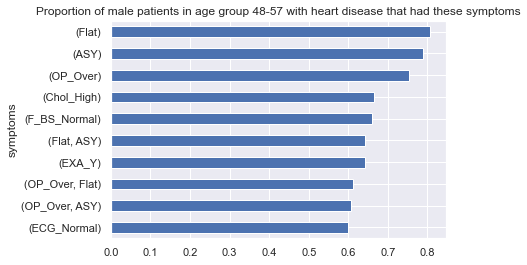

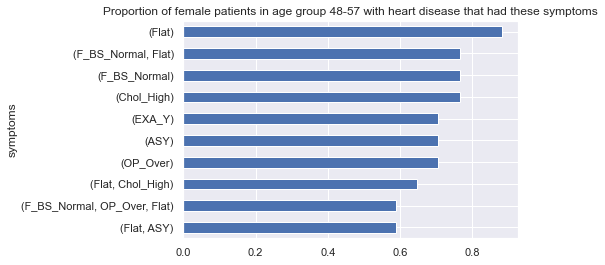

In [26]:
#MEN AND WOMEN 48_57 WITH HEART DISEASE
resultYes48_57Men[(resultYes48_57Men['consequents'] == frozenset({'HD_Yes'}))][0:20]
topTenYes48_57Men = resultYes48_57Men[(resultYes48_57Men['consequents'] == frozenset({'HD_Yes'}))][0:10].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes48_57Men.rename(columns={'antecedents': 'symptoms', 'support': 'proportion of patients with symptoms'}, inplace=True)
topTenYes48_57Men.plot(kind = 'barh', x='symptoms', title='Proportion of male patients in age group 48-57 with heart disease that had these symptoms', legend=False).invert_yaxis()

resultYes48_57Women[(resultYes48_57Women['consequents'] == frozenset({'HD_Yes'}))][0:20]
topTenYes48_57Women = resultYes48_57Women[(resultYes48_57Women['consequents'] == frozenset({'HD_Yes'}))][0:10].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes48_57Women.rename(columns={'antecedents': 'symptoms', 'support': 'proportion of patients with symptoms'}, inplace=True)
topTenYes48_57Women.plot(kind = 'barh', x='symptoms', title='Proportion of female patients in age group 48-57 with heart disease that had these symptoms', legend=False).invert_yaxis()


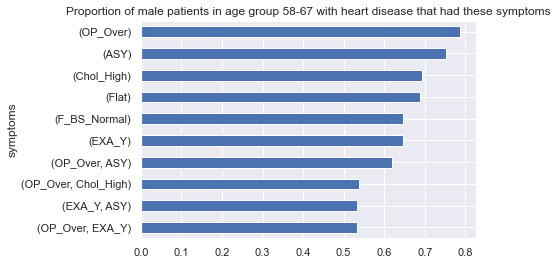

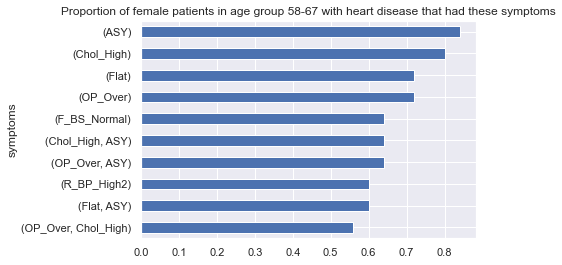

In [27]:
#MEN AND WOMEN 58_67 WITH HEART DISEASE
resultYes58_67Men[(resultYes58_67Men['consequents'] == frozenset({'HD_Yes'}))][0:20]
topTenYes58_67Men = resultYes58_67Men[(resultYes58_67Men['consequents'] == frozenset({'HD_Yes'}))][0:10].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes58_67Men.rename(columns={'antecedents': 'symptoms', 'support': 'proportion of patients with symptoms'}, inplace=True)
topTenYes58_67Men.plot(kind = 'barh', x='symptoms', title='Proportion of male patients in age group 58-67 with heart disease that had these symptoms', legend=False).invert_yaxis()

resultYes58_67Women[(resultYes58_67Women['consequents'] == frozenset({'HD_Yes'}))][0:20]
topTenYes58_67Women = resultYes58_67Women[(resultYes58_67Women['consequents'] == frozenset({'HD_Yes'}))][0:10].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes58_67Women.rename(columns={'antecedents': 'symptoms', 'support': 'proportion of patients with symptoms'}, inplace=True)
topTenYes58_67Women.plot(kind = 'barh', x='symptoms', title='Proportion of female patients in age group 58-67 with heart disease that had these symptoms', legend=False).invert_yaxis()

,symptoms,consequents,proportion of patients with symptoms
111,(OP_Over),(HD_Yes),0.756757
100,(Flat),(HD_Yes),0.702703
15,(ASY),(HD_Yes),0.702703
77,(EXA_Y),(HD_Yes),0.648649
114,(R_BP_High2),(HD_Yes),0.621622
93,(F_BS_Normal),(HD_Yes),0.540541
767,"(OP_Over, R_BP_High2)",(HD_Yes),0.540541
221,"(EXA_Y, ASY)",(HD_Yes),0.513514
297,"(OP_Over, ASY)",(HD_Yes),0.513514
730,"(OP_Over, Flat)",(HD_Yes),0.513514


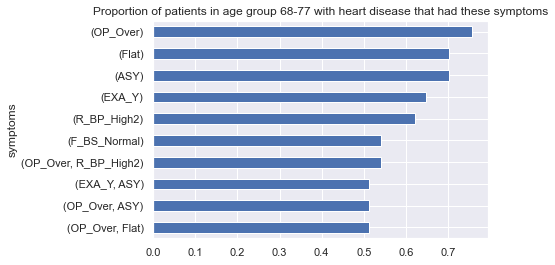

In [28]:
#MEN 68-77 WITH HEART DISEASE
resultYes68_77Men[(resultYes68_77Men['consequents'] == frozenset({'HD_Yes'}))][0:20]
topTenYes68_77Men = resultYes68_77Men[(resultYes68_77Men['consequents'] == frozenset({'HD_Yes'}))][0:10].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes68_77Men.rename(columns={'antecedents': 'symptoms', 'support': 'proportion of patients with symptoms'}, inplace=True)
topTenYes68_77Men.plot(kind = 'barh', x='symptoms', title='Proportion of patients in age group 68-77 with heart disease that had these symptoms', legend=False).invert_yaxis()
topTenYes68_77Men

In [29]:
topTenYes38_47Men = changeFeatureValueNames(topTenYes38_47Men)
#topTenYes38_47Men['sex/age'] = 'M 38-47'
topTenYes38_47Men['age'] = '38-47'
topTenYes38_47Men['sex'] = 'M'
topTenYes38_47Women = changeFeatureValueNames(topTenYes38_47Women)
#topTenYes38_47Women['sex/age'] = 'F 38-47'
topTenYes38_47Women['age'] = '38-47'
topTenYes38_47Women['sex'] = 'F'

topTenYes48_57Men = changeFeatureValueNames(topTenYes48_57Men)
#topTenYes48_57Men['sex/age'] = 'M 48-57'
topTenYes48_57Men['age'] = '48-57'
topTenYes48_57Men['sex'] = 'M'
topTenYes48_57Women = changeFeatureValueNames(topTenYes48_57Women)
#topTenYes48_57Women['sex/age'] = 'F 48-57'
topTenYes48_57Women['age'] = '48-57'
topTenYes48_57Women['sex'] = 'F'

topTenYes58_67Men = changeFeatureValueNames(topTenYes58_67Men)
#topTenYes58_67Men['sex/age'] = 'M 58-67'
topTenYes58_67Men['age'] = '58-67'
topTenYes58_67Men['sex'] = 'M'
topTenYes58_67Women = changeFeatureValueNames(topTenYes58_67Women)
#topTenYes58_67Women['sex/age'] = 'F 58-67'
topTenYes58_67Women['age'] = '58-67'
topTenYes58_67Women['sex'] = 'F'


,index,symptoms,consequents,proportion of patients with symptoms,age,sex
0,1,Chest Pain: ASY,(HD_Yes),0.833333,38-47,F
0,17,Chest Pain: ASY,(HD_Yes),0.833333,38-47,M
5,11,Chest Pain: ASY,(HD_Yes),0.705882,48-57,F
1,18,Chest Pain: ASY,(HD_Yes),0.788235,48-57,M
0,13,Chest Pain: ASY,(HD_Yes),0.840000,58-67,F
1,17,Chest Pain: ASY,(HD_Yes),0.751445,58-67,M


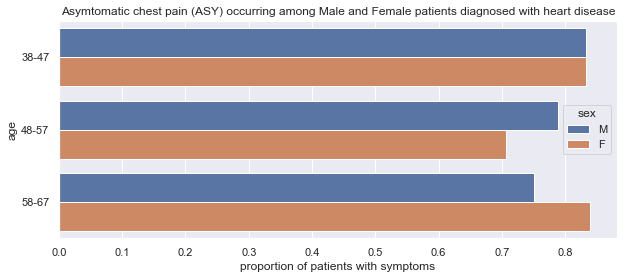

In [30]:
aggrMF38_47to58_67 = pd.concat([topTenYes38_47Men, topTenYes38_47Women, topTenYes48_57Men, topTenYes48_57Women, topTenYes58_67Men, topTenYes58_67Women])#.drop(['level_0'],1)
aggrMF38_47to58_67
aggrMF38_47to58_67 = aggrMF38_47to58_67.sort_values(['age', 'sex'])
ChestPainASY = aggrMF38_47to58_67[(aggrMF38_47to58_67['symptoms'] == 'Chest Pain: ASY')]
ChestPainASY
fig, ax = plt.subplots(figsize=(10,4))
sbn.barplot(data=ChestPainASY, x='proportion of patients with symptoms', y='age', ax=ax, hue='sex', hue_order=['M','F']).set(title='Asymtomatic chest pain (ASY) occurring among Male and Female patients diagnosed with heart disease')
#plt.savefig('aggrMF38_47to58_67.pdf',  bbox_inches='tight')
ChestPainASY

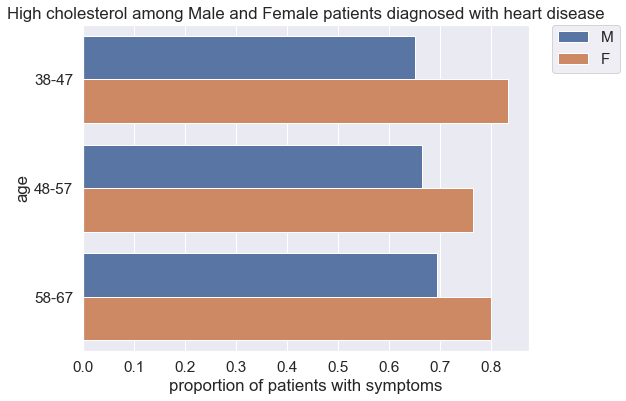

In [47]:
CholesterolHigh = aggrMF38_47to58_67[(aggrMF38_47to58_67['symptoms'] == 'Cholesterol: High')]
fig, ax = plt.subplots(figsize=(8,6))
sbn.set(font_scale = 1.4)
sbn.barplot(data=CholesterolHigh, x='proportion of patients with symptoms', y='age', ax=ax, hue='sex', hue_order=['M','F']).set(title='High cholesterol among Male and Female patients diagnosed with heart disease')
#plt.savefig('aggrMF38_47to58_67.pdf',  bbox_inches='tight')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

CholesterolHigh
plt.savefig('Chol_Hi_Agegroups.pdf', bbox_inches='tight')

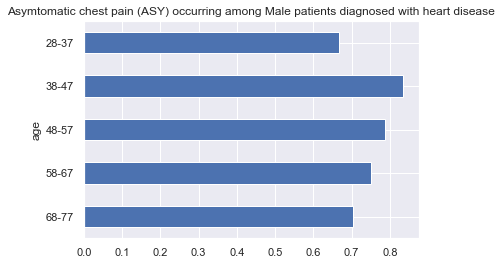

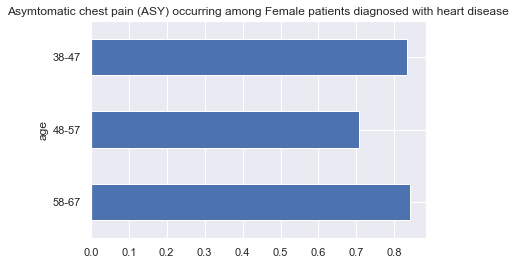

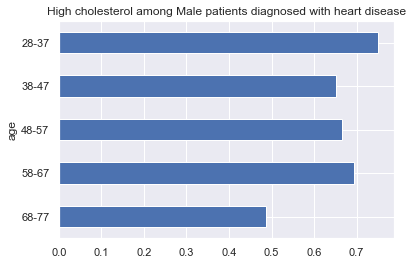

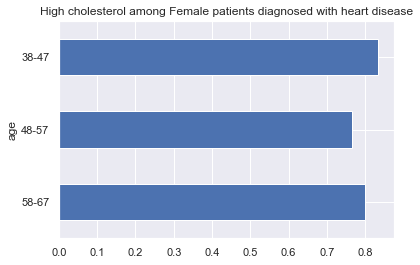

In [32]:
topTenYes28_37MenASY = resultYes28_37Men[(resultYes28_37Men['consequents'] == frozenset({'HD_Yes'}))& (resultYes28_37Men['antecedents'] == frozenset({'ASY'}))].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes28_37MenASY.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenYes28_37MenASY['age'] = '28-37'
 
topTenYes38_47MenASY = resultYes38_47Men[(resultYes38_47Men['consequents'] == frozenset({'HD_Yes'}))& (resultYes38_47Men['antecedents'] == frozenset({'ASY'}))].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes38_47MenASY.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenYes38_47MenASY['age'] = '38-47'
 
topTenYes48_57MenASY = resultYes48_57Men[(resultYes48_57Men['consequents'] == frozenset({'HD_Yes'}))& (resultYes48_57Men['antecedents'] == frozenset({'ASY'}))].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes48_57MenASY.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenYes48_57MenASY['age'] = '48-57'
 
topTenYes58_67MenASY = resultYes58_67Men[(resultYes58_67Men['consequents'] == frozenset({'HD_Yes'}))& (resultYes58_67Men['antecedents'] == frozenset({'ASY'}))].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes58_67MenASY.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenYes58_67MenASY['age'] = '58-67'
 
topTenYes68_77MenASY = resultYes68_77Men[(resultYes68_77Men['consequents'] == frozenset({'HD_Yes'})) & (resultYes68_77Men['antecedents'] == frozenset({'ASY'}))].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes68_77MenASY.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenYes68_77MenASY['age'] = '68-77'
 
topTenYes28_77MenASY = pd.concat([topTenYes28_37MenASY,topTenYes38_47MenASY,topTenYes48_57MenASY,topTenYes58_67MenASY, topTenYes68_77MenASY])
topTenYes28_77MenASY.plot(kind = 'barh', x='age', title='Asymtomatic chest pain (ASY) occurring among Male patients diagnosed with heart disease', legend=False).invert_yaxis()
 
#=========================
 
topTenYes38_47WomenASY = resultYes38_47Women[(resultYes38_47Women['consequents'] == frozenset({'HD_Yes'}))& (resultYes38_47Women['antecedents'] == frozenset({'ASY'}))].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes38_47WomenASY.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenYes38_47WomenASY['age'] = '38-47'
 
topTenYes48_57WomenASY = resultYes48_57Women[(resultYes48_57Women['consequents'] == frozenset({'HD_Yes'}))& (resultYes48_57Women['antecedents'] == frozenset({'ASY'}))].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes48_57WomenASY.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenYes48_57WomenASY['age'] = '48-57'
 
topTenYes58_67WomenASY = resultYes58_67Women[(resultYes58_67Women['consequents'] == frozenset({'HD_Yes'}))& (resultYes58_67Women['antecedents'] == frozenset({'ASY'}))].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes58_67WomenASY.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenYes58_67WomenASY['age'] = '58-67'
 
topTenYes38_67WomenASY = pd.concat([topTenYes38_47WomenASY,topTenYes48_57WomenASY,topTenYes58_67WomenASY])
topTenYes38_67WomenASY.plot(kind = 'barh', x='age', title='Asymtomatic chest pain (ASY) occurring among Female patients diagnosed with heart disease', legend=False).invert_yaxis()
 
#==================
 
topTenYes28_37Men_Chol_High = resultYes28_37Men[(resultYes28_37Men['consequents'] == frozenset({'HD_Yes'}))& (resultYes28_37Men['antecedents'] == frozenset({'Chol_High'}))].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes28_37Men_Chol_High.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenYes28_37Men_Chol_High['age'] = '28-37'
 
topTenYes38_47Men_Chol_High = resultYes38_47Men[(resultYes38_47Men['consequents'] == frozenset({'HD_Yes'}))& (resultYes38_47Men['antecedents'] == frozenset({'Chol_High'}))].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes38_47Men_Chol_High.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenYes38_47Men_Chol_High['age'] = '38-47'
 
topTenYes48_57Men_Chol_High = resultYes48_57Men[(resultYes48_57Men['consequents'] == frozenset({'HD_Yes'}))& (resultYes48_57Men['antecedents'] == frozenset({'Chol_High'}))].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes48_57Men_Chol_High.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenYes48_57Men_Chol_High['age'] = '48-57'
 
topTenYes58_67Men_Chol_High = resultYes58_67Men[(resultYes58_67Men['consequents'] == frozenset({'HD_Yes'}))& (resultYes58_67Men['antecedents'] == frozenset({'Chol_High'}))].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes58_67Men_Chol_High.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenYes58_67Men_Chol_High['age'] = '58-67'
 
topTenYes68_77Men_Chol_High = resultYes68_77Men[(resultYes68_77Men['consequents'] == frozenset({'HD_Yes'})) & (resultYes68_77Men['antecedents'] == frozenset({'Chol_High'}))].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes68_77Men_Chol_High.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenYes68_77Men_Chol_High['age'] = '68-77'
 
topTenYes28_77Men_Chol_High = pd.concat([topTenYes28_37Men_Chol_High,topTenYes38_47Men_Chol_High,topTenYes48_57Men_Chol_High,topTenYes58_67Men_Chol_High, topTenYes68_77Men_Chol_High])
topTenYes28_77Men_Chol_High.plot(kind = 'barh', x='age', title='High cholesterol among Male patients diagnosed with heart disease', legend=False).invert_yaxis()
 
#===========
 
topTenYes38_47Women_Chol_High = resultYes38_47Women[(resultYes38_47Women['consequents'] == frozenset({'HD_Yes'}))& (resultYes38_47Women['antecedents'] == frozenset({'Chol_High'}))].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes38_47Women_Chol_High.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenYes38_47Women_Chol_High['age'] = '38-47'
 
topTenYes48_57Women_Chol_High = resultYes48_57Women[(resultYes48_57Women['consequents'] == frozenset({'HD_Yes'}))& (resultYes48_57Women['antecedents'] == frozenset({'Chol_High'}))].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes48_57Women_Chol_High.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenYes48_57Women_Chol_High['age'] = '48-57'
 
topTenYes58_67Women_Chol_High = resultYes58_67Women[(resultYes58_67Women['consequents'] == frozenset({'HD_Yes'}))& (resultYes58_67Women['antecedents'] == frozenset({'Chol_High'}))].drop(['antecedent support','consequent support', 'confidence', 'lift','leverage','conviction'], 1)
topTenYes58_67Women_Chol_High.rename(columns={'antecedents': 'symptoms', 'support': 'Proportion of symptoms'}, inplace=True)
topTenYes58_67Women_Chol_High['age'] = '58-67'
 
topTenYes38_67Women_Chol_High = pd.concat([topTenYes38_47Women_Chol_High,topTenYes48_57Women_Chol_High,topTenYes58_67Women_Chol_High])
topTenYes38_67Women_Chol_High.plot(kind = 'barh', x='age', title='High cholesterol among Female patients diagnosed with heart disease', legend=False).invert_yaxis()